## Importing libraries

In [1]:
import pickle
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

### Load training data

In [3]:
train_files = ["data_batch_1", "data_batch_2", "data_batch_3", "data_batch_4", "data_batch_5"]
train_dicts = [0]*5
Y_train = []
for ind in range(len(train_dicts)):
    train_dicts[ind] = unpickle("./Datasets/Question-1/cifar-10-python/cifar-10-batches-py/"+train_files[ind])
X_train= np.empty((0,3072))
for ind in range(len(train_dicts)):
    X_train = np.vstack((X_train, train_dicts[ind][b'data']))
    Y_train.extend(train_dicts[ind][b'labels'])

### Load testing data

In [4]:
test_dict = unpickle("./Datasets/Question-1/cifar-10-python/cifar-10-batches-py/test_batch")
X_test = test_dict[b'data']
Y_test = test_dict[b'labels']

In [51]:
X_train, _ , Y_train, _ = train_test_split(X_train, Y_train, train_size=.6)
Orig_img = X_train.copy()

# Principal component analysis for dimensionality reduction

## Components vs variance plot 

In [5]:
components = []
var = []
pca = PCA()
X_train = pca.fit_transform(X_train)
total = sum(pca.explained_variance_)
k = 0
c_v = 0
c = 1
var = [x*100 for x in var]

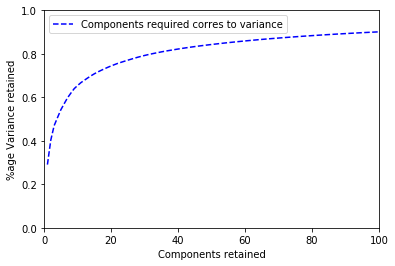

In [53]:
while c_v/total < 1:
    c_v += pca.explained_variance_[k]
    k += 1
    components.append(c)
    c += 1
    var.append(c_v/total)
plt.plot(components, var, 'b--',label="Components required corres to variance")
plt.legend(loc='best')
plt.axis([0, 100, 0, 1])
plt.xlabel('Components retained')
plt.ylabel('%age Variance retained')
# plt.figure(figsize=(20,17))
plt.show()

#### Retaining 60% variance

In [6]:
pca = PCA()
X_train = pca.fit_transform(X_train)
total = sum(pca.explained_variance_)
k = 0
c_v = 0
while c_v/total < .6:
    c_v += pca.explained_variance_[k]
    k += 1
k

8

## Transforming data by PCA

In [7]:
pca = PCA(n_components=k)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# LinearSVC classifier on PCA processed data

In [56]:
img_classifier = LinearSVC(dual=False,C=2)
img_classifier.fit(X_train, Y_train)
pl = img_classifier.predict(X_test)
print(classification_report(Y_test,pl, zero_division=1))

              precision    recall  f1-score   support

           0       0.11      0.89      0.19      1000
           1       0.00      0.00      0.00      1000
           2       0.13      0.03      0.04      1000
           3       0.11      0.09      0.10      1000
           4       1.00      0.00      0.00      1000
           5       0.13      0.02      0.03      1000
           6       1.00      0.00      0.00      1000
           7       0.11      0.07      0.08      1000
           8       1.00      0.00      0.00      1000
           9       1.00      0.00      0.00      1000

    accuracy                           0.11     10000
   macro avg       0.46      0.11      0.04     10000
weighted avg       0.46      0.11      0.04     10000



#### Classification report for C=2

In [57]:
img_classifier = LinearSVC(dual=False,C=20)
img_classifier.fit(X_train, Y_train)
pl = img_classifier.predict(X_test)
print(classification_report(Y_test,pl, zero_division=1))

              precision    recall  f1-score   support

           0       0.11      0.89      0.19      1000
           1       0.00      0.00      0.00      1000
           2       0.13      0.03      0.04      1000
           3       0.11      0.09      0.10      1000
           4       1.00      0.00      0.00      1000
           5       0.13      0.02      0.03      1000
           6       1.00      0.00      0.00      1000
           7       0.11      0.07      0.08      1000
           8       1.00      0.00      0.00      1000
           9       1.00      0.00      0.00      1000

    accuracy                           0.11     10000
   macro avg       0.46      0.11      0.04     10000
weighted avg       0.46      0.11      0.04     10000



#### Classification report for C=20

# SVC classifier without preprocessing

In [ ]:
img_classifier = SVC(C=2,kernel='linear')
img_classifier.fit(X_train, Y_train)
pl = img_classifier.predict(X_test)
print(classification_report(Y_test,pl, zero_division=1))

#### Classification report for C=2

In [ ]:
sup_vec = img_classifier.support_
for point in sup_vec:
    plt.imshow(Orig_img[point].reshape(32,32,3))

# Stochastic Gradient Descent Linear SVM classifier with PCA processed data

In [11]:
img_classifier = SGDClassifier(n_jobs=-1,alpha=100,max_iter=1000000)
img_classifier.fit(X_train, Y_train)
pl = img_classifier.predict(X_test)
print(classification_report(Y_test,pl, zero_division=1))

              precision    recall  f1-score   support

           0       0.12      0.74      0.20      1000
           1       1.00      0.00      0.00      1000
           2       1.00      0.00      0.00      1000
           3       1.00      0.00      0.00      1000
           4       1.00      0.00      0.00      1000
           5       1.00      0.00      0.00      1000
           6       1.00      0.00      0.00      1000
           7       1.00      0.00      0.00      1000
           8       0.08      0.29      0.13      1000
           9       0.03      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.72      0.10      0.03     10000
weighted avg       0.72      0.10      0.03     10000



## K nearest neighbours

In [12]:
import numpy as np
import math

class KNNClassifier:

    def __init__(self, k_value=5):
        self.k_parameter = k_value
        self.data_arr = None
        self.train_res = None

    def train(self, dar, Y_col):
        # self.data_arr = np.genfromtxt(train_dataframe_path, delimiter = ',')
        self.data_arr = dar
        self.train_res = Y_col
#         self.data_arr = self.data_arr[:, 1:]

    def predict(self, test_egs):
        # test_egs = np.genfromtxt(test_dataframe_path, delimiter = ',')
        prediction_list = []
        for test_ind in range(test_egs.shape[0]):
            lis = []
            test_row = test_egs[test_ind,:]
            hashmap = [0 for i in range(10)]
            for train_ind in range(self.data_arr.shape[0]):
                train_row = self.data_arr[train_ind,:]
                diff = test_row - train_row
                diff = diff*diff
                dist = (diff.sum())
                lis.append([dist, self.train_res[train_ind]])
                lis = sorted(lis, key=lambda pair:pair[0])
                lis = lis[0:self.k_parameter]
            for pair in lis:
                hashmap[int(pair[1])] += 1
            maxval = hashmap[0]
            ind = 0
            for iter in range(1,10):
                val = hashmap[iter]
                if val > maxval:
                    maxval = val
                    ind = iter
            prediction_list.append(ind)
        return prediction_list

### Load training data

In [13]:
train_files = ["data_batch_1", "data_batch_2", "data_batch_3", "data_batch_4", "data_batch_5"]
train_dicts = [0]*5
Y_train = []
for ind in range(len(train_dicts)):
    train_dicts[ind] = unpickle("./Datasets/Question-1/cifar-10-python/cifar-10-batches-py/"+train_files[ind])
X_train= np.empty((0,3072))
for ind in range(len(train_dicts)):
    X_train = np.vstack((X_train, train_dicts[ind][b'data']))
    Y_train.extend(train_dicts[ind][b'labels'])

### Load testing data

In [16]:
# test_dict = unpickle("./Datasets/Question-1/cifar-10-python/cifar-10-batches-py/test_batch")
# X_test = test_dict[b'data']
# Y_test = test_dict[b'labels']
X_train, X_test , Y_train, Y_test = train_test_split(X_train, Y_train, train_size=.6)

In [ ]:
kc = KNNClassifier()
kc.train(X_train,Y_train)
print(accuracy_score(Y_test, kc.predict(X_test)))